In [1]:
import pandas as pd

df = pd.read_csv('countries.csv')
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
df

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
238,YE,15.552727,48.516388,Yemen
239,YT,-12.827500,45.166244,Mayotte
240,ZA,-30.559482,22.937506,South Africa
241,ZM,-13.133897,27.849332,Zambia


In [2]:
#1. Dựa vào dữ liệu sau, hiển thị tọa độ của theo lat và lon của các nước lên một bản đồ
import plotly.express as px

fig = px.scatter_geo(df,lat='latitude',lon='longitude', hover_name="name")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [3]:
#2. Phân cụm theo 3 thuật toán K-Means, DBSCAN, và DPC
for i in range(len(df['name'])):
    df['name'][i] = i + 1
df = df.drop(['country'], axis=True)
df

C:\Users\khanh\AppData\Local\Temp\ipykernel_7756\3946242136.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,latitude,longitude,name
0,42.546245,1.601554,1
1,23.424076,53.847818,2
2,33.939110,67.709953,3
3,17.060816,-61.796428,4
4,18.220554,-63.068615,5
...,...,...,...
238,15.552727,48.516388,239
239,-12.827500,45.166244,240
240,-30.559482,22.937506,241
241,-13.133897,27.849332,242


In [4]:
import numpy as np

data_arr = np.array(df)
data_arr

array([[42.546245, 1.601554, 1],
       [23.424076, 53.847818, 2],
       [33.93911, 67.709953, 3],
       [17.060816, -61.796428, 4],
       [18.220554, -63.068615, 5],
       [41.153332, 20.168331, 6],
       [40.069099, 45.038189, 7],
       [12.226079, -69.060087, 8],
       [-11.202692, 17.873887, 9],
       [-75.250973, -0.071389, 10],
       [-38.416097, -63.616672, 11],
       [-14.270972, -170.132217, 12],
       [47.516231, 14.550072, 13],
       [-25.274398, 133.775136, 14],
       [12.52111, -69.968338, 15],
       [40.143105, 47.576927, 16],
       [43.915886, 17.679076, 17],
       [13.193887, -59.543198, 18],
       [23.684994, 90.356331, 19],
       [50.503887, 4.469936, 20],
       [12.238333, -1.561593, 21],
       [42.733883, 25.48583, 22],
       [25.930414, 50.637772, 23],
       [-3.373056, 29.918886, 24],
       [9.30769, 2.315834, 25],
       [32.321384, -64.75737, 26],
       [4.535277, 114.727669, 27],
       [-16.290154, -63.588653, 28],
       [-14.235004, -

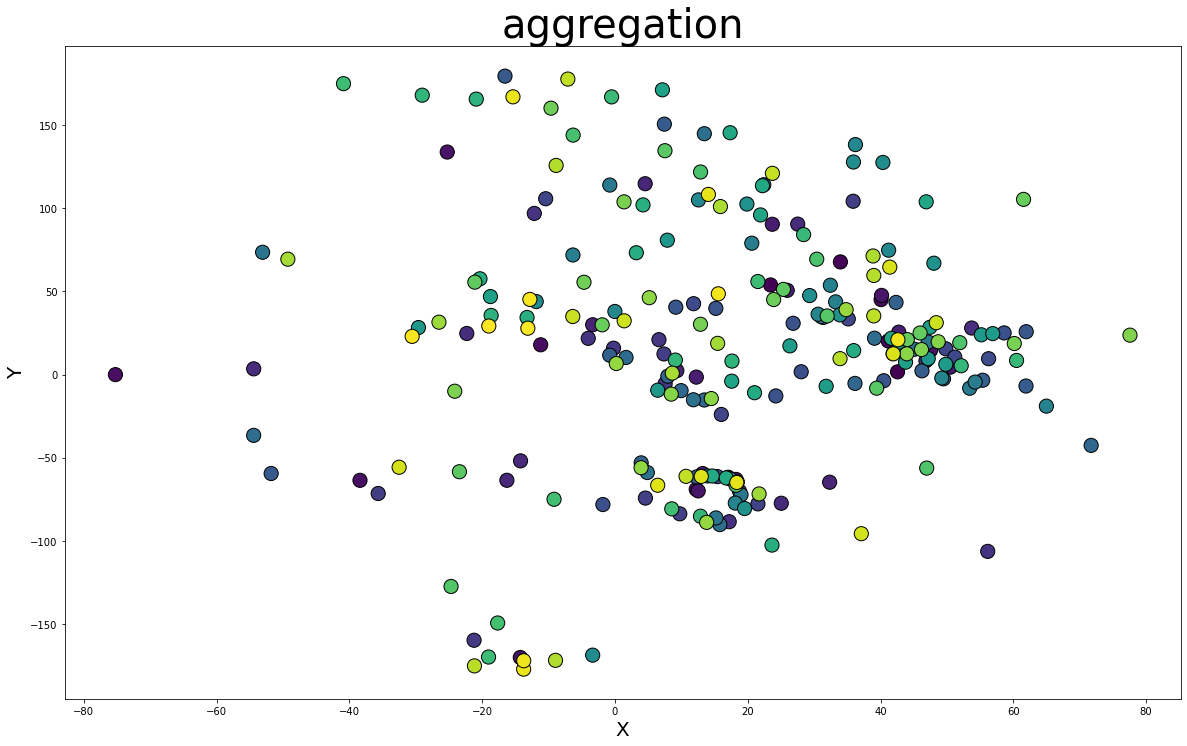

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=df.iloc[:,2], marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title("aggregation", fontsize=40)
plt.show()

In [6]:
#Phân cụm sử dụng Kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6)
y_pred = kmeans.fit_predict(df.iloc[:,[0,1]])

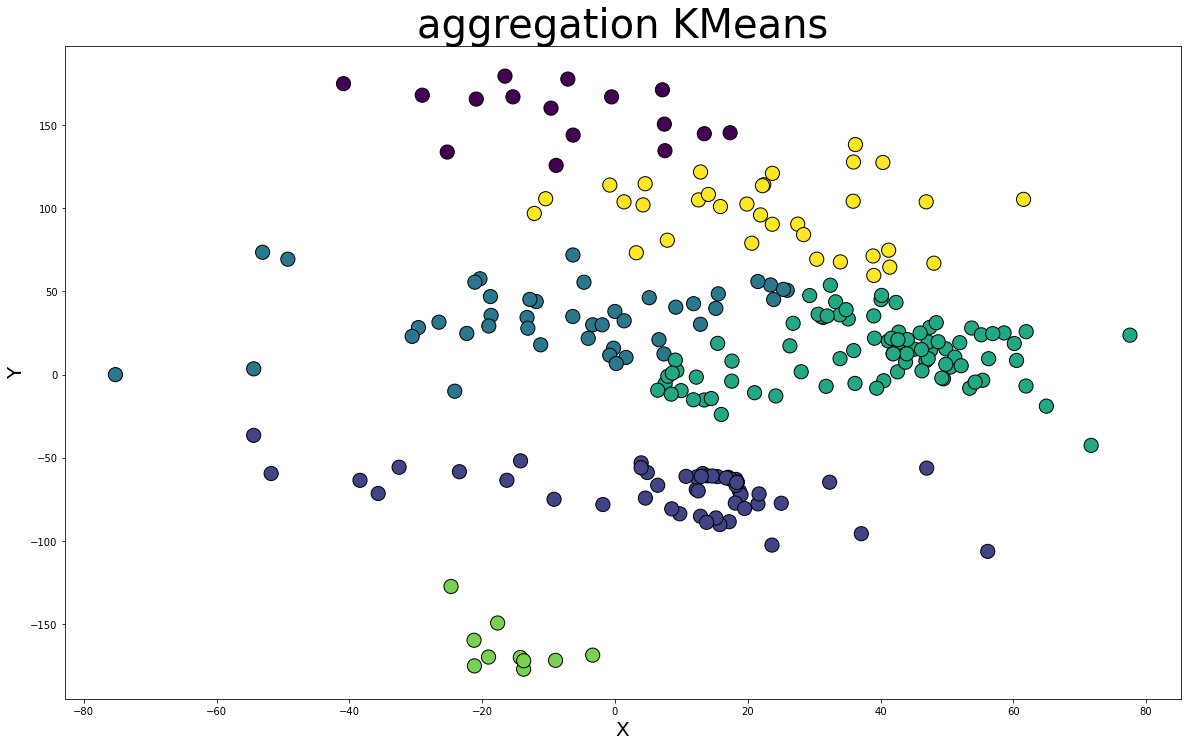

In [7]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=y_pred, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title("aggregation" + " KMeans", fontsize=40)
plt.show()

0.18114313459328862


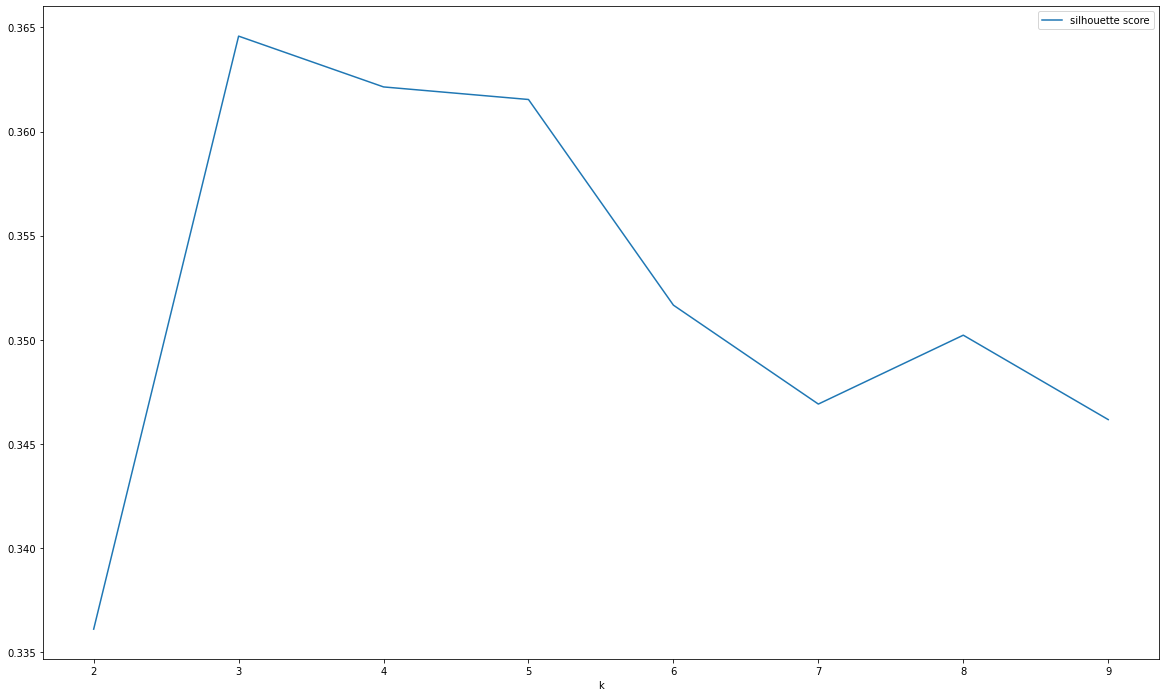

In [8]:
from sklearn import metrics

print(metrics.silhouette_score(df,y_pred))
from sklearn.metrics.cluster import silhouette_score
k_values = []
silhouette_score_values = []

for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  y_pred = kmeans.fit_predict(df)
  k_values.append(i)
  silhouette_score_values.append(metrics.silhouette_score(df, y_pred))
result = pd.DataFrame({'k': k_values, 'silhouette score': silhouette_score_values})
result.plot.line(x='k', y = 'silhouette score', figsize=(20,12))
plt.show()

In [9]:
#Phân cụm sử dụng DBSCAN
import ipywidgets as widgets
display(widgets.HTML(f'<img src="examples/9D6aAF2.gif">'))

HTML(value='<img src="examples/9D6aAF2.gif">')

In [10]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2.5, min_samples=15).fit(df)
y_pred_DB = db.fit_predict(df)

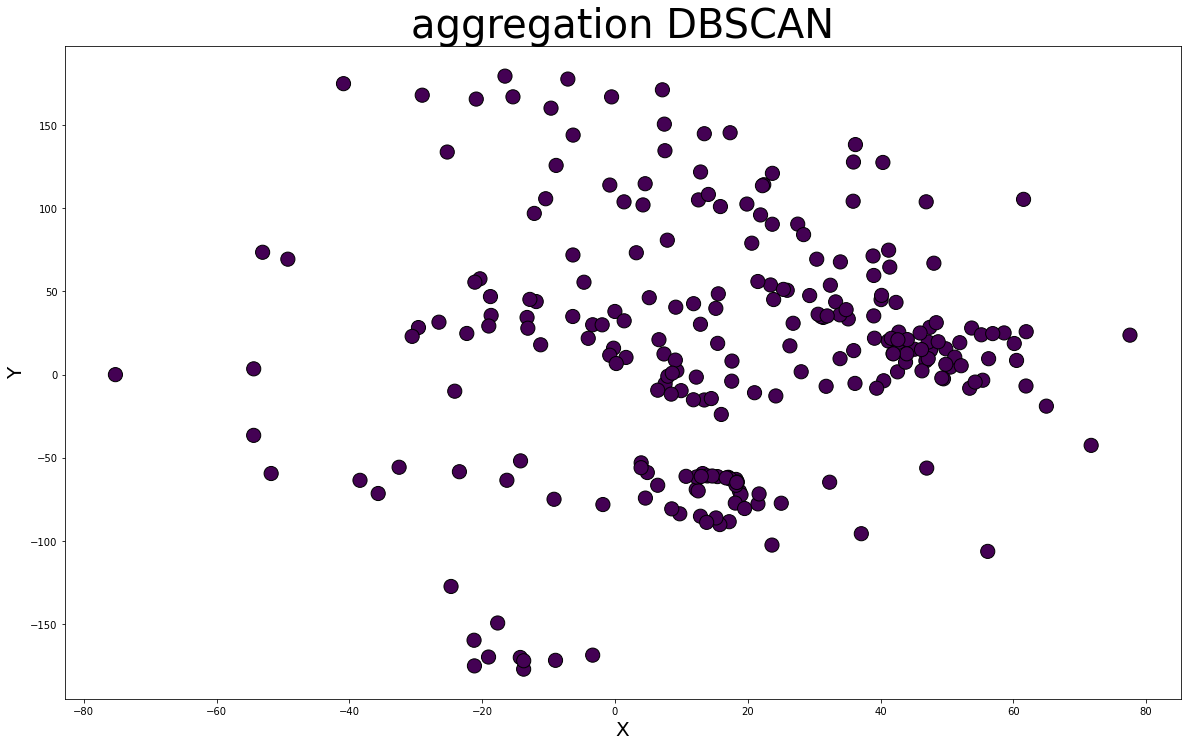

In [11]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=y_pred_DB, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.title("aggregation" + " DBSCAN", fontsize=40)
plt.show()

In [17]:
#Phân cụm sử dụng DPC
from dpca import DensityPeakCluster 

dpca = DensityPeakCluster(density_threshold=8, distance_threshold=5, anormal=False)
dpca.fit(df.iloc[:,[0,1]])

In [18]:
rho = dpca.local_density()
delta, nneigh = dpca.min_neighbor_and_distance()
labels, center = dpca.collapse()

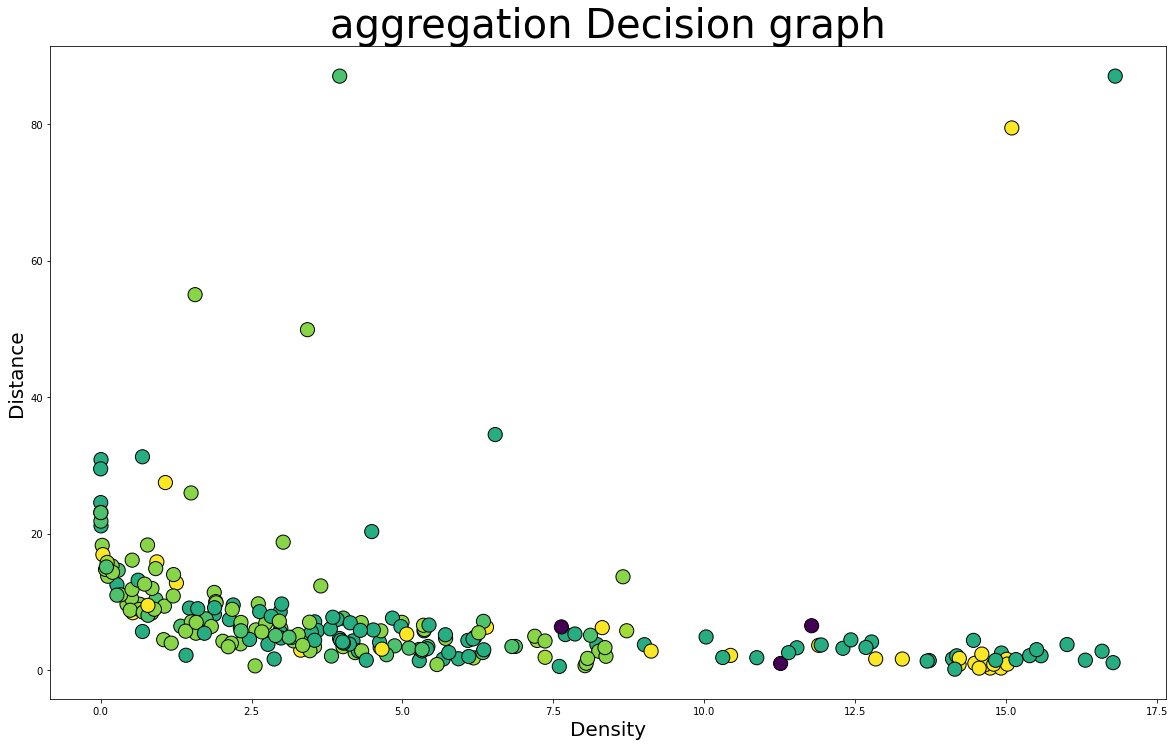

In [20]:
plt.figure(figsize=(20,12))
plt.scatter(
    rho,delta,
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("Density", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.title("aggregation" + " Decision graph", fontsize=40)
plt.show()

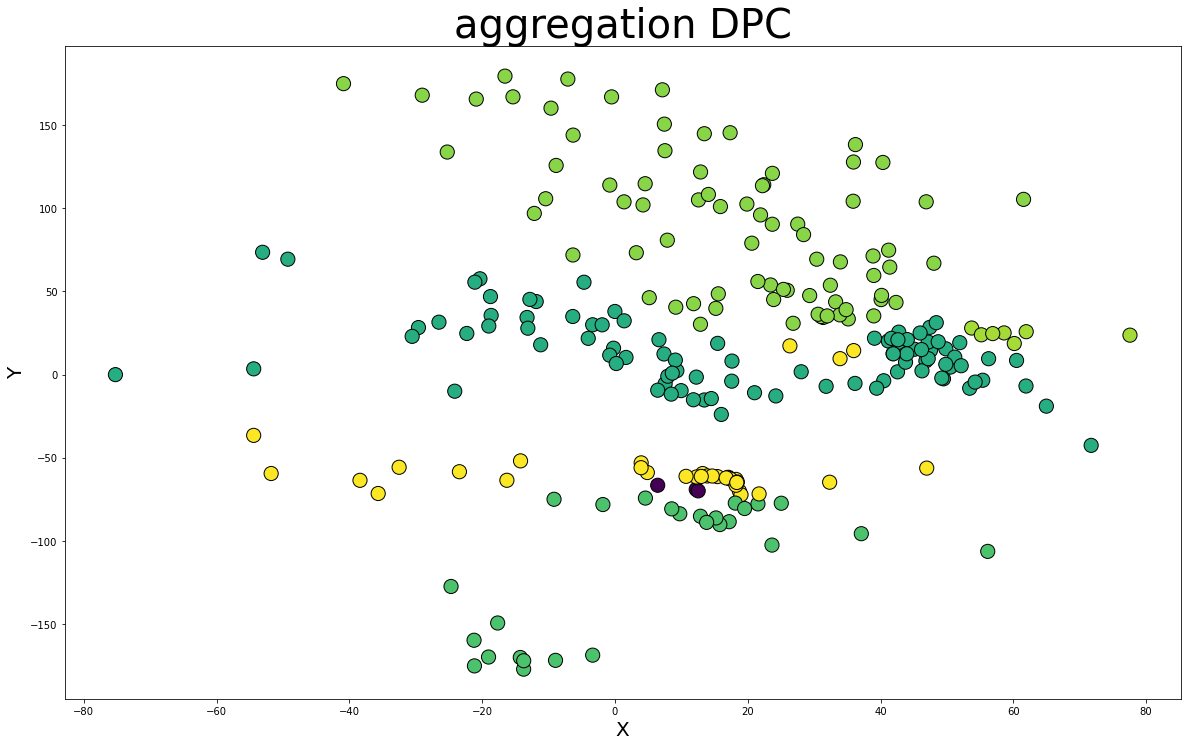

In [21]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:,0],data_arr[:,1],
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title("aggregation" + " DPC", fontsize=40)
plt.show()

In [ ]:
#3. So sánh kết quả và nhận xét
#Phân cụm sử dụng Kmeas cho các điểm dữ liệu cùng 1 cụm sát nhat hơn trong khi đó DPC rời rạc hơn. Còn đối với DBSCAN trong bài toán này ta chỉ
#thấy duy nhất dữ liệu đều thuộc 1 cụm